In [87]:
from pathlib import Path
import pandas as pd


In [89]:
df = pd.DataFrame()

for p in Path("data").glob("*.xlsx"):
    df_current = pd.read_excel(p, skiprows=0)
    df = pd.concat([df, df_current], ignore_index=True)

df.columns = ["日付", "店舗", "商品", "個数", "売上"]
df.head()

,日付,店舗,商品,個数,売上
0,2025-01-12,店舗B,商品3,1,1288
1,2025-01-23,店舗C,商品3,8,14800
2,2025-01-29,店舗A,商品2,9,17253
3,2025-02-07,店舗A,商品1,3,3507
4,2025-01-26,店舗A,商品2,10,18130


In [99]:
pivot = df.pivot_table(values=["個数", "売上"], index="日付", columns="店舗", aggfunc="sum")
# pivot["売上"]
pivot

個数                   売上                  
店舗           店舗A   店舗B   店舗C      店舗A      店舗B      店舗C
日付                                                     
2025-01-11  17.0   7.0   8.0  16641.0  11758.0  16788.0
2025-01-12   3.0   1.0   NaN  12624.0   1288.0      NaN
2025-01-13   2.0   7.0   NaN   2868.0  23574.0      NaN
2025-01-14   2.0   NaN   NaN  15030.0      NaN      NaN
2025-01-15   NaN   9.0  10.0      NaN   5125.0  15303.0
2025-01-16   NaN   6.0   2.0      NaN   3057.0  11505.0
2025-01-17   2.0   7.0   NaN  17315.0   3070.0      NaN
2025-01-18  13.0   NaN  10.0  10494.0      NaN  16829.0
2025-01-19   NaN   NaN   6.0      NaN      NaN  16087.0
2025-01-20   8.0   8.0   NaN  11320.0   5704.0      NaN
2025-01-21   NaN  12.0   NaN      NaN  24983.0      NaN
2025-01-22   1.0   NaN   NaN    603.0      NaN      NaN
2025-01-23   NaN   NaN  16.0      NaN      NaN  27053.0
2025-01-24   2.0   9.0  10.0  17092.0   1861.0  16150.0
2025-01-25   NaN   5.0  13.0      NaN   3527.0   7985.0
2025-01-26  11.0   NaN   NaN  19390.0      NaN      NaN
2025-01-27   7.0   NaN   NaN   1778.0      NaN      NaN
2025-01-28   4.0   4.0   NaN  16038.0  11183.0      NaN
2025-01-29  16.0   5.0   NaN  20769.0  16022.0      NaN
2025-01-30  11.0  11.0   NaN  25691.0  32919.0      NaN
2025-01-31   NaN   7.0   8.0      NaN  36734.0   7565.0
2025-02-01   NaN   1.0   NaN      NaN  19952.0      NaN
2025-02-02  18.0   NaN   NaN   9047.0      NaN      NaN
2025-02-03   NaN   7.0   1.0      NaN   8078.0    672.0
2025-02-04   7.0  10.0  10.0  15361.0  12182.0  19691.0
2025-02-05   NaN   8.0   NaN      NaN   6299.0      NaN
2025-02-06   NaN   NaN  11.0      NaN      NaN  24483.0
2025-02-07   9.0   NaN   NaN  21683.0      NaN      NaN
2025-02-08  11.0   1.0   NaN  32721.0   8695.0      NaN

In [101]:
pivot.sum()

    店舗 
個数  店舗A       144.0
    店舗B       125.0
    店舗C       105.0
売上  店舗A    266465.0
    店舗B    236011.0
    店舗C    180111.0
dtype: float64

In [103]:
pivot.max()

    店舗 
個数  店舗A       18.0
    店舗B       12.0
    店舗C       16.0
売上  店舗A    32721.0
    店舗B    36734.0
    店舗C    27053.0
dtype: float64

In [105]:
pivot.loc["2025-01-11", "売上"]

店舗
店舗A    16641.0
店舗B    11758.0
店舗C    16788.0
Name: 2025-01-11 00:00:00, dtype: float64

In [107]:
pivot.loc["2025-01-11"]

    店舗 
個数  店舗A       17.0
    店舗B        7.0
    店舗C        8.0
売上  店舗A    16641.0
    店舗B    11758.0
    店舗C    16788.0
Name: 2025-01-11 00:00:00, dtype: float64

In [109]:
pivot.loc[:, "売上"]

店舗,店舗A,店舗B,店舗C
日付,,,
2025-01-11,16641.0,11758.0,16788.0
2025-01-12,12624.0,1288.0,NaN
2025-01-13,2868.0,23574.0,NaN
2025-01-14,15030.0,NaN,NaN
2025-01-15,NaN,5125.0,15303.0
2025-01-16,NaN,3057.0,11505.0
2025-01-17,17315.0,3070.0,NaN
2025-01-18,10494.0,NaN,16829.0
2025-01-19,NaN,NaN,16087.0


In [115]:
pivot.loc["Total"] = pivot.sum()
pivot

個数                      売上                    
店舗                     店舗A    店舗B    店舗C       店舗A       店舗B       店舗C
日付                                                                    
2025-01-11 00:00:00   17.0    7.0    8.0   16641.0   11758.0   16788.0
2025-01-12 00:00:00    3.0    1.0    NaN   12624.0    1288.0       NaN
2025-01-13 00:00:00    2.0    7.0    NaN    2868.0   23574.0       NaN
2025-01-14 00:00:00    2.0    NaN    NaN   15030.0       NaN       NaN
2025-01-15 00:00:00    NaN    9.0   10.0       NaN    5125.0   15303.0
2025-01-16 00:00:00    NaN    6.0    2.0       NaN    3057.0   11505.0
2025-01-17 00:00:00    2.0    7.0    NaN   17315.0    3070.0       NaN
2025-01-18 00:00:00   13.0    NaN   10.0   10494.0       NaN   16829.0
2025-01-19 00:00:00    NaN    NaN    6.0       NaN       NaN   16087.0
2025-01-20 00:00:00    8.0    8.0    NaN   11320.0    5704.0       NaN
2025-01-21 00:00:00    NaN   12.0    NaN       NaN   24983.0       NaN
2025-01-22 00:00:00    1.0    NaN    NaN     603.0       NaN       NaN
2025-01-23 00:00:00    NaN    NaN   16.0       NaN       NaN   27053.0
2025-01-24 00:00:00    2.0    9.0   10.0   17092.0    1861.0   16150.0
2025-01-25 00:00:00    NaN    5.0   13.0       NaN    3527.0    7985.0
2025-01-26 00:00:00   11.0    NaN    NaN   19390.0       NaN       NaN
2025-01-27 00:00:00    7.0    NaN    NaN    1778.0       NaN       NaN
2025-01-28 00:00:00    4.0    4.0    NaN   16038.0   11183.0       NaN
2025-01-29 00:00:00   16.0    5.0    NaN   20769.0   16022.0       NaN
2025-01-30 00:00:00   11.0   11.0    NaN   25691.0   32919.0       NaN
2025-01-31 00:00:00    NaN    7.0    8.0       NaN   36734.0    7565.0
2025-02-01 00:00:00    NaN    1.0    NaN       NaN   19952.0       NaN
2025-02-02 00:00:00   18.0    NaN    NaN    9047.0       NaN       NaN
2025-02-03 00:00:00    NaN    7.0    1.0       NaN    8078.0     672.0
2025-02-04 00:00:00    7.0   10.0   10.0   15361.0   12182.0   19691.0
2025-02-05 00:00:00    NaN    8.0    NaN       NaN    6299.0       NaN
2025-02-06 00:00:00    NaN    NaN   11.0       NaN       NaN   24483.0
2025-02-07 00:00:00    9.0    NaN    NaN   21683.0       NaN       NaN
2025-02-08 00:00:00   11.0    1.0    NaN   32721.0    8695.0       NaN
Total                432.0  375.0  315.0  799395.0  708033.0  540333.0

<Axes: >

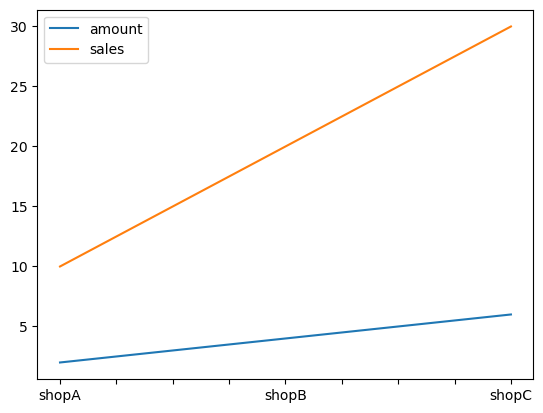

In [119]:
df = pd.DataFrame({
    "amount" : [2, 4, 6],
    "sales" : [10, 20, 30],
}, index=["shopA", "shopB", "shopC"])
df.plot()

array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

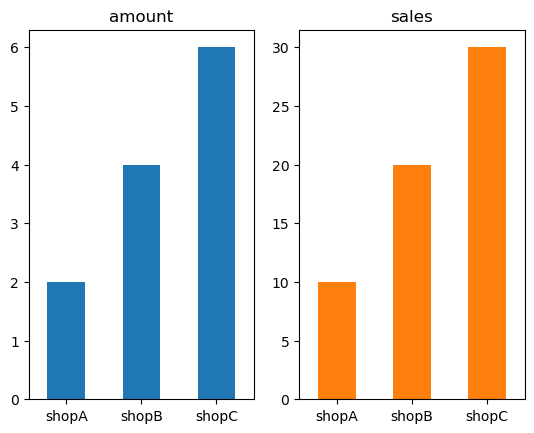

In [133]:
df.plot(kind="bar", legend=False, rot=0, subplots=True, layout=(1, 2))

<Axes: >

C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  func(*args, **kwargs)
C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from current font.
  func(*args, **kwargs)
C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  func(*args, **kwargs)
C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from current font.
  func(*args, **kwargs)
C:\Users\utaka\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19978 (\N{CJK UN

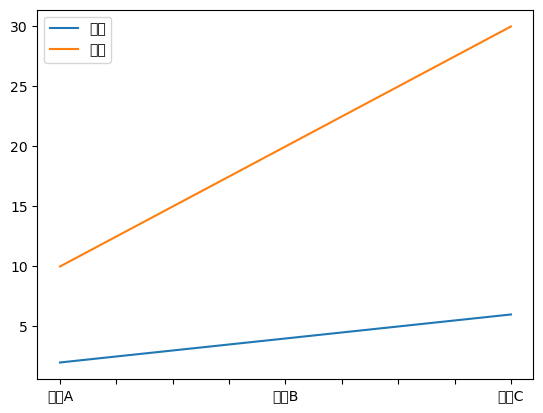

In [135]:
df = pd.DataFrame({
    "個数" : [2, 4, 6],
    "売上" : [10, 20, 30],
}, index=["店舗A", "店舗B", "店舗C"])
df.plot()

array([[<Axes: title={'center': '個数'}>, <Axes: title={'center': '売上'}>]],
      dtype=object)

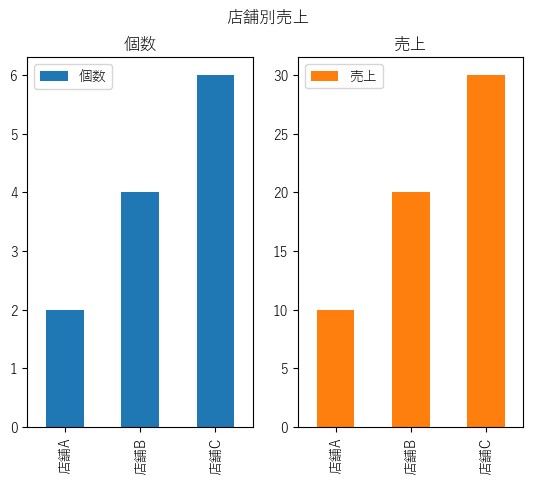

In [139]:
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Hiragino Maru Gothic Pro", "Yu Gothic", "Meiryo"]
df = pd.DataFrame({
    "個数" : [2, 4, 6],
    "売上" : [10, 20, 30],
}, index=["店舗A", "店舗B", "店舗C"])
df.plot(kind="bar", title="店舗別売上", subplots=True, layout=(1, 2))

In [145]:
from pathlib import Path
import pandas as pd

df = pd.DataFrame()

for p in Path("data").glob("*.xlsx"):
    df_current = pd.read_excel(p, skiprows=0)
    df = pd.concat([df, df_current], ignore_index=True)

df.columns = ["日付", "店舗", "商品", "個数", "売上"]

pivot = df.pivot_table(values=["個数", "売上"], index="日付", columns="店舗", aggfunc="sum")
pivot

個数                   売上                  
店舗           店舗A   店舗B   店舗C      店舗A      店舗B      店舗C
日付                                                     
2025-01-11  17.0   7.0   8.0  16641.0  11758.0  16788.0
2025-01-12   3.0   1.0   NaN  12624.0   1288.0      NaN
2025-01-13   2.0   7.0   NaN   2868.0  23574.0      NaN
2025-01-14   2.0   NaN   NaN  15030.0      NaN      NaN
2025-01-15   NaN   9.0  10.0      NaN   5125.0  15303.0
2025-01-16   NaN   6.0   2.0      NaN   3057.0  11505.0
2025-01-17   2.0   7.0   NaN  17315.0   3070.0      NaN
2025-01-18  13.0   NaN  10.0  10494.0      NaN  16829.0
2025-01-19   NaN   NaN   6.0      NaN      NaN  16087.0
2025-01-20   8.0   8.0   NaN  11320.0   5704.0      NaN
2025-01-21   NaN  12.0   NaN      NaN  24983.0      NaN
2025-01-22   1.0   NaN   NaN    603.0      NaN      NaN
2025-01-23   NaN   NaN  16.0      NaN      NaN  27053.0
2025-01-24   2.0   9.0  10.0  17092.0   1861.0  16150.0
2025-01-25   NaN   5.0  13.0      NaN   3527.0   7985.0
2025-01-26  11.0   NaN   NaN  19390.0      NaN      NaN
2025-01-27   7.0   NaN   NaN   1778.0      NaN      NaN
2025-01-28   4.0   4.0   NaN  16038.0  11183.0      NaN
2025-01-29  16.0   5.0   NaN  20769.0  16022.0      NaN
2025-01-30  11.0  11.0   NaN  25691.0  32919.0      NaN
2025-01-31   NaN   7.0   8.0      NaN  36734.0   7565.0
2025-02-01   NaN   1.0   NaN      NaN  19952.0      NaN
2025-02-02  18.0   NaN   NaN   9047.0      NaN      NaN
2025-02-03   NaN   7.0   1.0      NaN   8078.0    672.0
2025-02-04   7.0  10.0  10.0  15361.0  12182.0  19691.0
2025-02-05   NaN   8.0   NaN      NaN   6299.0      NaN
2025-02-06   NaN   NaN  11.0      NaN      NaN  24483.0
2025-02-07   9.0   NaN   NaN  21683.0      NaN      NaN
2025-02-08  11.0   1.0   NaN  32721.0   8695.0      NaN

In [147]:
pivot.loc["Total"] = pivot.sum()
pivot

個数                      売上                    
店舗                     店舗A    店舗B    店舗C       店舗A       店舗B       店舗C
日付                                                                    
2025-01-11 00:00:00   17.0    7.0    8.0   16641.0   11758.0   16788.0
2025-01-12 00:00:00    3.0    1.0    NaN   12624.0    1288.0       NaN
2025-01-13 00:00:00    2.0    7.0    NaN    2868.0   23574.0       NaN
2025-01-14 00:00:00    2.0    NaN    NaN   15030.0       NaN       NaN
2025-01-15 00:00:00    NaN    9.0   10.0       NaN    5125.0   15303.0
2025-01-16 00:00:00    NaN    6.0    2.0       NaN    3057.0   11505.0
2025-01-17 00:00:00    2.0    7.0    NaN   17315.0    3070.0       NaN
2025-01-18 00:00:00   13.0    NaN   10.0   10494.0       NaN   16829.0
2025-01-19 00:00:00    NaN    NaN    6.0       NaN       NaN   16087.0
2025-01-20 00:00:00    8.0    8.0    NaN   11320.0    5704.0       NaN
2025-01-21 00:00:00    NaN   12.0    NaN       NaN   24983.0       NaN
2025-01-22 00:00:00    1.0    NaN    NaN     603.0       NaN       NaN
2025-01-23 00:00:00    NaN    NaN   16.0       NaN       NaN   27053.0
2025-01-24 00:00:00    2.0    9.0   10.0   17092.0    1861.0   16150.0
2025-01-25 00:00:00    NaN    5.0   13.0       NaN    3527.0    7985.0
2025-01-26 00:00:00   11.0    NaN    NaN   19390.0       NaN       NaN
2025-01-27 00:00:00    7.0    NaN    NaN    1778.0       NaN       NaN
2025-01-28 00:00:00    4.0    4.0    NaN   16038.0   11183.0       NaN
2025-01-29 00:00:00   16.0    5.0    NaN   20769.0   16022.0       NaN
2025-01-30 00:00:00   11.0   11.0    NaN   25691.0   32919.0       NaN
2025-01-31 00:00:00    NaN    7.0    8.0       NaN   36734.0    7565.0
2025-02-01 00:00:00    NaN    1.0    NaN       NaN   19952.0       NaN
2025-02-02 00:00:00   18.0    NaN    NaN    9047.0       NaN       NaN
2025-02-03 00:00:00    NaN    7.0    1.0       NaN    8078.0     672.0
2025-02-04 00:00:00    7.0   10.0   10.0   15361.0   12182.0   19691.0
2025-02-05 00:00:00    NaN    8.0    NaN       NaN    6299.0       NaN
2025-02-06 00:00:00    NaN    NaN   11.0       NaN       NaN   24483.0
2025-02-07 00:00:00    9.0    NaN    NaN   21683.0       NaN       NaN
2025-02-08 00:00:00   11.0    1.0    NaN   32721.0    8695.0       NaN
Total                144.0  125.0  105.0  266465.0  236011.0  180111.0

In [149]:
from matplotlib import rcParams
from pathlib import Path
import pandas as pd

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Hiragino Maru Gothic Pro", "Yu Gothic", "Meiryo"]

df = pd.DataFrame()

for p in Path("data").glob("*.xlsx"):
    df_current = pd.read_excel(p, skiprows=0)
    df = pd.concat([df, df_current], ignore_index=True)

df.columns = ["日付", "店舗", "商品", "個数", "売上"]

pivot = df.pivot_table(values=["個数", "売上"], index="日付", columns="店舗", aggfunc="sum")

array([<Axes: title={'center': '店舗A'}>, <Axes: title={'center': '店舗B'}>,
       <Axes: title={'center': '店舗C'}>], dtype=object)

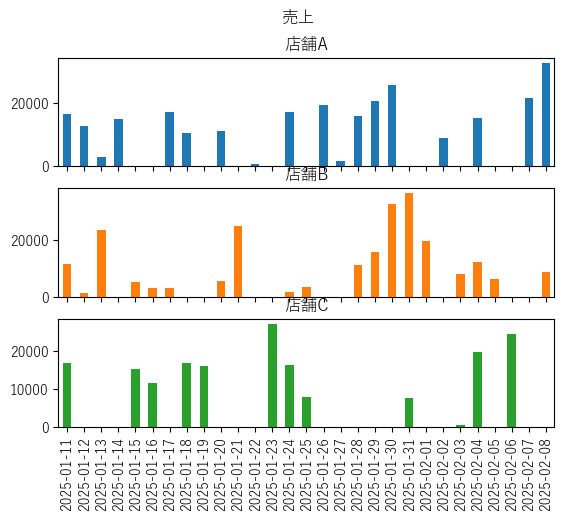

In [179]:
pivot.index = [str(d)[:10] for d in pivot.index] #日付を文字列にし、時間以外を取り出す。
pivot["売上"].plot(kind="bar", title="売上", legend=False, subplots=True)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

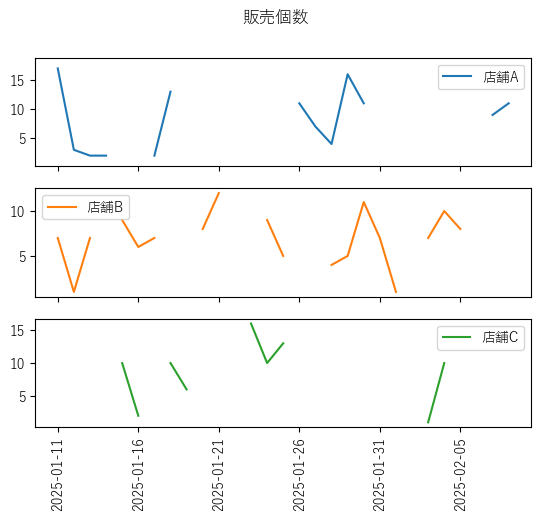

In [193]:
pivot["個数"].plot(title="販売個数", rot=90, subplots=True)